# Importing the libraries

In [1]:
import sklearn # for machine learning model
import numpy as np # for working with arrays in python
import pandas as pd # for reading the files
import matplotlib.pyplot as plt # for plotting the graphs
from sklearn.linear_model import LinearRegression # importing linear regression model from sklearn
from sklearn.metrics import r2_score # for calculating r2 value to predict the accuracy of the model
import statsmodels.formula.api as smf # A convenient interface for specifying models using formula strings and dataframes
# r2 near to 1 => good model
# r2 near to 0 => bad model

(21, 2)
   DeliveryTime  SortingTime
0         21.00           10
1         13.50            4
2         19.75            6
3         24.00            9
4         29.00           10
5         15.35            6
6         19.00            7
7          9.50            3
8         17.90           10
9         18.75            9


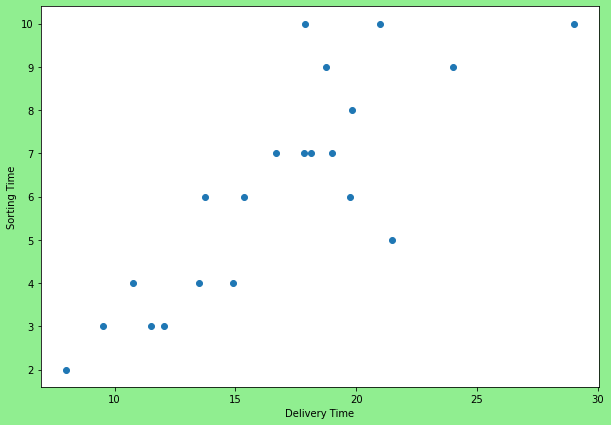

In [2]:
dataset = pd.read_csv('delivery_time.csv')# reading the csv file from source
print(dataset.shape) # size of the data
print("="*30)

print(dataset.head(10)) # top 10 records of the dataset

plt.figure(figsize=(10,7), facecolor="lightgreen") # creating new figure with figuresize 10,7 and of green color
plt.scatter(dataset.DeliveryTime, dataset.SortingTime) # plotting the scatter plot with x-axis as Delivery time and y-axis as Sorting time
plt.xlabel('Delivery Time') # label of x-axis
plt.ylabel('Sorting Time') # label of y-axis
plt.show() # to print the graph

In [3]:
dataset.corr() # near to 1 positive correlation, near to 0 negative correlation

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


# Creating Model with SKLEARN

In [13]:
dataset['DeliveryTime'].values.reshape(-1,1).shape # reshaping the data with one feature

(21, 1)

In [4]:
lm = LinearRegression() # giving alias to the linear regression model
X = dataset['DeliveryTime'].values.reshape(-1,1) # the library can't take the data as it is and for that we have to change it to numpy array
Y = dataset['SortingTime'].values.reshape(-1,1)# -1 internally decides the number of rows according to the number columns

reg_sklearn = lm.fit(X,Y) # create the best possible line in the form of y=ax+b

In [6]:
print(X)

[[21.  ]
 [13.5 ]
 [19.75]
 [24.  ]
 [29.  ]
 [15.35]
 [19.  ]
 [ 9.5 ]
 [17.9 ]
 [18.75]
 [19.83]
 [10.75]
 [16.68]
 [11.5 ]
 [12.03]
 [14.88]
 [13.75]
 [18.11]
 [ 8.  ]
 [17.83]
 [21.5 ]]


In [7]:
print(Y)

[[10]
 [ 4]
 [ 6]
 [ 9]
 [10]
 [ 6]
 [ 7]
 [ 3]
 [10]
 [ 9]
 [ 8]
 [ 4]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 2]
 [ 7]
 [ 5]]


In [8]:
print(reg_sklearn.coef_) # alpha of y=ax+b
print(reg_sklearn.intercept_) # beta of y=ax_b

[[0.41374363]]
[-0.75667337]


In [9]:
reg_sklearn.predict(X) # predicting y' using X in the table

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

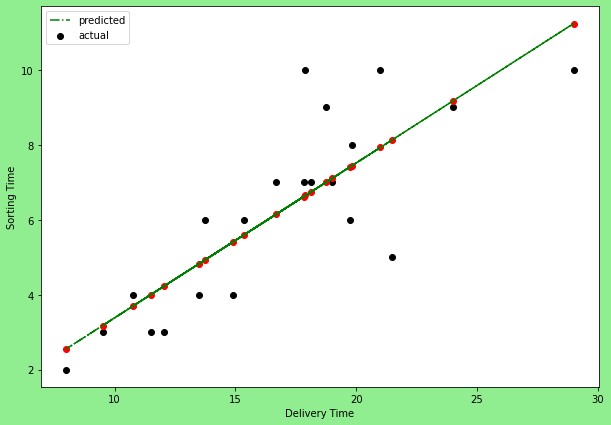

In [10]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dataset.DeliveryTime,(dataset.SortingTime),color="black",label="actual");
plt.plot(dataset.DeliveryTime,reg_sklearn.predict(X),label="predicted",color="green",linestyle="-.");
plt.scatter(dataset.DeliveryTime,reg_sklearn.predict(X),color="red")
plt.xlabel("Delivery Time");
plt.ylabel("Sorting Time")
# print (wcat.AT)
plt.legend(loc="best")
plt.show()

# Model Validation

In [11]:
pred_train_lm =reg_sklearn.predict(X)
r2_score(dataset["SortingTime"],pred_train_lm) 

0.682271474841723

# Model with statsmodels

In [12]:
first_model = smf.ols("SortingTime~DeliveryTime",data=dataset).fit()

In [13]:
first_model.params

Intercept      -0.756673
DeliveryTime    0.413744
dtype: float64

In [14]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        23:31:33   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7567      1.134     -0.667      0.513      -3.130       1.617
DeliveryTime     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

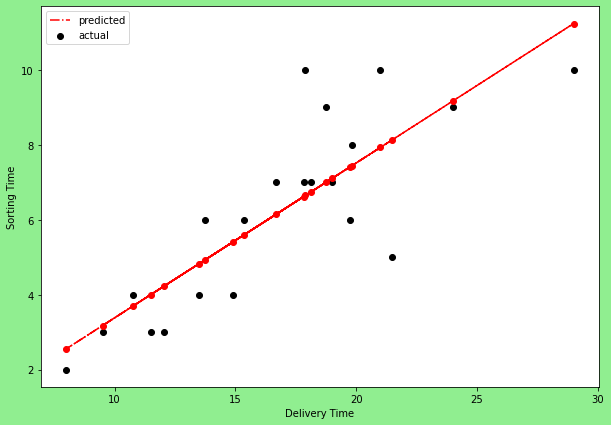

In [15]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dataset.DeliveryTime,(dataset.SortingTime),color="black",label="actual");
plt.plot(dataset.DeliveryTime,first_model.predict(dataset['DeliveryTime']),label="predicted",color="red",linestyle="-.");
plt.scatter(dataset.DeliveryTime,first_model.predict(dataset['DeliveryTime']),color="red")
plt.xlabel("Delivery Time");
plt.ylabel("Sorting Time")
# print (wcat.AT)
plt.legend(loc="best")
plt.show()

In [16]:
model2 = smf.ols('SortingTime~np.log(DeliveryTime)',data=dataset).fit() #y' = alogx+b
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.59e-06
Time:                        23:31:44   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(DeliveryTime)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2 = smf.ols('np.log(SortingTime)~DeliveryTime',data=dataset).fit() #logy' = ax+b
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Thu, 14 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                         23:32:22   Log-Likelihood:               -0.85600
No. Observations:                   21   AIC:                             5.712
Df Residuals:                       19   BIC:                             7.801
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4372      0.204      2.139      0.046       0.009       0.865
DeliveryTime     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
smf.ols('SortingTime~np.exp(DeliveryTime)',data=dataset).fit().summary() # y' = a(e^x)+b

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SortingTime   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.572
Date:                Thu, 14 Jul 2022   Prob (F-statistic):              0.125
Time:                        23:32:58   Log-Likelihood:                -47.544
No. Observations:                  21   AIC:                             99.09
Df Residuals:                      19   BIC:                             101.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.9973      0.548     10.953      0.000       4.851       7.143
np.exp(DeliveryTime)  1.024e-12   6.38e-13      1.604      0.125   -3.12e-13    2.36e-12
==============================================================================
Omnibus:                        1.359   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                0.890
Skew:                           0.091   Prob(JB):                        0.641
Kurtosis:                       2.008   Cond. No.                     8.79e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
dataset["delivery_Sq"] = dataset.SortingTime**2 
model_quad = smf.ols("np.log(SortingTime)~DeliveryTime+delivery_Sq",data=dataset).fit() #logy'=ax+ax^2+b
# model_quad.params
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(SortingTime)   R-squared:                       0.883
Model:                             OLS   Adj. R-squared:                  0.870
Method:                  Least Squares   F-statistic:                     68.17
Date:                 Wed, 06 Jul 2022   Prob (F-statistic):           3.99e-09
Time:                         19:12:04   Log-Likelihood:                 9.2232
No. Observations:                   21   AIC:                            -12.45
Df Residuals:                       18   BIC:                            -9.313
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8537      0.151      5.646      0.000       0.536       1.171
DeliveryTime     0.0247      0.012      2.024      0.058      -0.001       0.050
delivery_Sq      0.0103      0.002      5.386      0.000       0.006       0.014
==============================================================================
Omnibus:                        4.025   Durbin-Watson:                   2.317
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                2.504
Skew:                          -0.835   Prob(JB):                        0.286
Kurtosis:                       3.271   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
dataset

,DeliveryTime,SortingTime,delivery_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [37]:
np.exp(model_quad.predict(dataset[["DeliveryTime","delivery_Sq"]]))

0     11.096382
1      3.867852
2      5.550675
3      9.818363
4     13.521128
5      4.978958
6      6.232786
7      3.259245
8     10.278309
9      8.624067
10     7.429375
11     3.613809
12     5.885604
13     3.424324
14     3.469455
15     4.001988
16     4.785994
17     6.097242
18     2.982418
19     6.055212
20     5.172737
dtype: float64